In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [5]:
# 1) Define the Newton map N1 for f(x) = x^3 - x - 1
x = sp.symbols('x')

# (a) Define the polynomial f(x) = x^3 - x - 1
f1 = x**3 - x - 1
f1p = sp.diff(f1, x)  # derivative: 3*x^2 - 1

# (b) Newton‐iteration function: N1(x) = x - f1(x)/f1'(x)
N1_expr = x - f1 / f1p
N1_simpl = sp.simplify(N1_expr)

print("=== Newton map N1(x) for f(x) = x^3 - x - 1 ===")
sp.pprint(N1_simpl)
print("\n")

=== Newton map N1(x) for f(x) = x^3 - x - 1 ===
   3    
2⋅x  + 1
────────
   2    
3⋅x  - 1




In [6]:
# Convert to a numerical (lambda) function for iteration
N1 = sp.lambdify(x, N1_simpl, 'numpy')


In [7]:
# 2) Define Q1(x) = x - N1(N1(N1(x))) and factor it symbolically
# Compose N1 three times:
N1_1 = N1_simpl.subs(x, x)           # N1[x]
N1_2 = N1_simpl.subs(x, N1_1)        # N1[N1[x]]
N1_3 = N1_simpl.subs(x, N1_2)        # N1[N1[N1[x]]]

# Q1(x) = x - N1(N1(N1(x)))
Q1_expr = sp.simplify(x - N1_3)

print("=== Q1(x) = x - N1(N1(N1(x))) before factoring ===")
sp.pprint(Q1_expr)
print("\nFactored Q1(x):")
Q1_factor = sp.factor(Q1_expr)
sp.pprint(Q1_factor)
print("\n")

# If desired, make a numeric function for Q1 as well:
Q1 = sp.lambdify(x, Q1_expr, 'numpy')

=== Q1(x) = x - N1(N1(N1(x))) before factoring ===
                         3    
      ⎛                3⎞     
      ⎜      ⎛   3    ⎞ ⎟     
      ⎜    2⋅⎝2⋅x  + 1⎠ ⎟     
    2⋅⎜1 + ─────────────⎟     
      ⎜               3 ⎟     
      ⎜     ⎛   2    ⎞  ⎟     
      ⎝     ⎝3⋅x  - 1⎠  ⎠     
    ────────────────────── - 1
                        3     
     ⎛                2⎞      
     ⎜      ⎛   3    ⎞ ⎟      
     ⎜    3⋅⎝2⋅x  + 1⎠ ⎟      
     ⎜1 - ─────────────⎟      
     ⎜               2 ⎟      
     ⎜     ⎛   2    ⎞  ⎟      
     ⎝     ⎝3⋅x  - 1⎠  ⎠      
x + ──────────────────────────
                         2    
      ⎛                3⎞     
      ⎜      ⎛   3    ⎞ ⎟     
      ⎜    2⋅⎝2⋅x  + 1⎠ ⎟     
    3⋅⎜1 + ─────────────⎟     
      ⎜               3 ⎟     
      ⎜     ⎛   2    ⎞  ⎟     
      ⎝     ⎝3⋅x  - 1⎠  ⎠     
    ────────────────────── - 1
                        2     
     ⎛                2⎞      
     ⎜      ⎛   3    ⎞ ⎟      
     ⎜    3⋅⎝2⋅x  +

In [8]:
# 3) Define the Newton map N2 for g(x) = x^3 - x + 1
g2 = x**3 - x + 1
g2p = sp.diff(g2, x)  # derivative: 3*x^2 - 1

N2_expr = x - g2 / g2p
N2_simpl = sp.simplify(N2_expr)

print("=== Newton map N2(x) for g(x) = x^3 - x + 1 ===")
sp.pprint(N2_simpl)
print("\n")

N2 = sp.lambdify(x, N2_simpl, 'numpy')

=== Newton map N2(x) for g(x) = x^3 - x + 1 ===
   3    
2⋅x  - 1
────────
   2    
3⋅x  - 1




In [9]:
# 4) Define Q2(x) = x - N2(N2(N2(x))) and factor it
N2_1 = N2_simpl.subs(x, x)
N2_2 = N2_simpl.subs(x, N2_1)
N2_3 = N2_simpl.subs(x, N2_2)

Q2_expr = sp.simplify(x - N2_3)

print("=== Q2(x) = x - N2(N2(N2(x))) before factoring ===")
sp.pprint(Q2_expr)
print("\nFactored Q2(x):")
Q2_factor = sp.factor(Q2_expr)
sp.pprint(Q2_factor)
print("\n")

Q2 = sp.lambdify(x, Q2_expr, 'numpy')

=== Q2(x) = x - N2(N2(N2(x))) before factoring ===
                         3    
      ⎛                3⎞     
      ⎜      ⎛   3    ⎞ ⎟     
      ⎜    2⋅⎝2⋅x  - 1⎠ ⎟     
    2⋅⎜1 - ─────────────⎟     
      ⎜               3 ⎟     
      ⎜     ⎛   2    ⎞  ⎟     
      ⎝     ⎝3⋅x  - 1⎠  ⎠     
    ────────────────────── - 1
                        3     
     ⎛                2⎞      
     ⎜      ⎛   3    ⎞ ⎟      
     ⎜    3⋅⎝2⋅x  - 1⎠ ⎟      
     ⎜1 - ─────────────⎟      
     ⎜               2 ⎟      
     ⎜     ⎛   2    ⎞  ⎟      
     ⎝     ⎝3⋅x  - 1⎠  ⎠      
x - ──────────────────────────
                         2    
      ⎛                3⎞     
      ⎜      ⎛   3    ⎞ ⎟     
      ⎜    2⋅⎝2⋅x  - 1⎠ ⎟     
    3⋅⎜1 - ─────────────⎟     
      ⎜               3 ⎟     
      ⎜     ⎛   2    ⎞  ⎟     
      ⎝     ⎝3⋅x  - 1⎠  ⎠     
    ────────────────────── - 1
                        2     
     ⎛                2⎞      
     ⎜      ⎛   3    ⎞ ⎟      
     ⎜    3⋅⎝2⋅x  -

In [10]:
# Numerical Exploration: Cobweb plots and “bifurcation‐style” graph(optional, but typical for “chaos” notebooks)
# (5a) Cobweb diagram for N1 around a fixed point (choose x0 near the real root of f1)
def cobweb_plot(func, x0, x_min=-2, x_max=2, steps=50):
    """
    Draw a cobweb plot of the iteration x_{n+1} = func(x_n) on [x_min, x_max].
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    xs = np.linspace(x_min, x_max, 400)
    ax.plot(xs, func(xs), 'b', label='N(x)')
    ax.plot(xs, xs, 'k--', alpha=0.5, label='y = x')
    x_old = x0
    for i in range(steps):
        x_new = func(x_old)
        # vertical line
        ax.plot([x_old, x_old], [x_old, x_new], 'r', alpha=0.6)
        # horizontal line
        ax.plot([x_old, x_new], [x_new, x_new], 'r', alpha=0.6)
        x_old = x_new
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(x_min, x_max)
    ax.set_xlabel('x_n')
    ax.set_ylabel('x_{n+1}')
    ax.set_title('Cobweb plot of N(x), starting at x0 = {:.3f}'.format(x0))
    ax.legend()
    plt.show()

Generating cobweb plot for N1 starting at x0 = 1.5 …


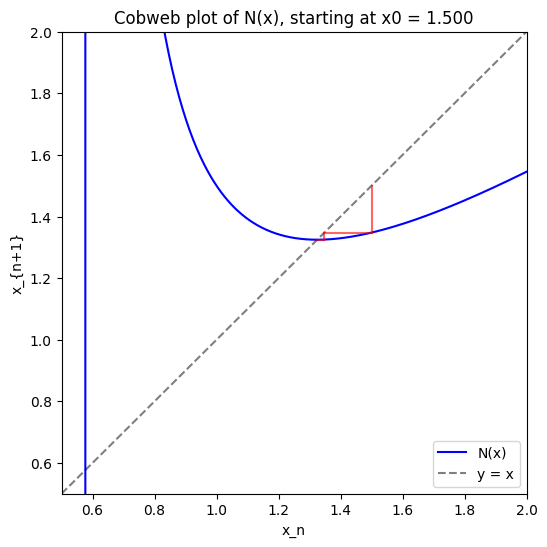

In [11]:
# Example: plot cobweb for N1 starting at x0 = 1.5
print("Generating cobweb plot for N1 starting at x0 = 1.5 …")
cobweb_plot(N1, x0=1.5, x_min=0.5, x_max=2.0, steps=30)

In [12]:
# (5b) “Bifurcation‐style” scan: iterate each x0 for many steps, then plot tail iterates
def bifurcation_scan(func, x_min, x_max, n_initial=1000, n_iter=200, last_k=50):
    """
    For func(x), scan initial x0 in a grid from x_min to x_max (n_initial points).
    For each x0, iterate x_{n+1} = func(x_n) for n_iter steps, then plot the last_k iterates.
    """
    x0_values = np.linspace(x_min, x_max, n_initial)
    results = []
    for x0 in x0_values:
        x = x0
        # warm‐up
        for _ in range(n_iter - last_k):
            x = func(x)
        # collect last last_k iterates
        tail = []
        for _ in range(last_k):
            x = func(x)
            tail.append(x)
        for y in tail:
            results.append((x0, y))
    # Convert to arrays
    xv = np.array([pt[0] for pt in results])
    yv = np.array([pt[1] for pt in results])
    return xv, yv

Performing bifurcation‐style scan for N1 …


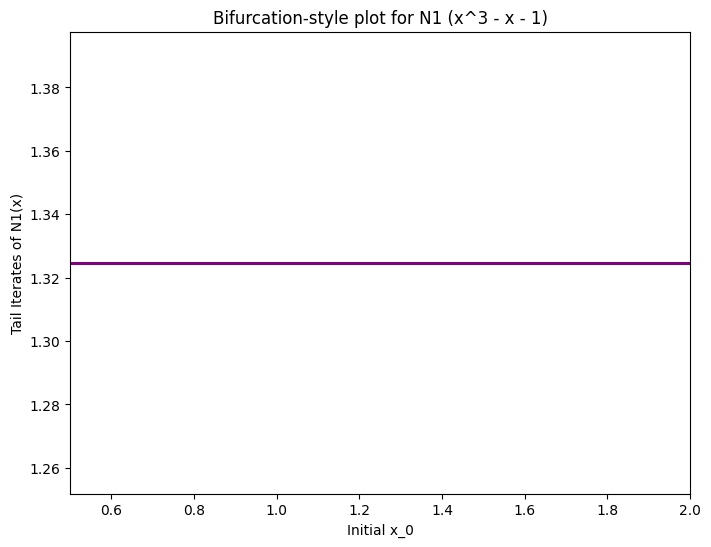

In [13]:
# Perform a scan for N1
print("Performing bifurcation‐style scan for N1 …")
xv1, yv1 = bifurcation_scan(N1, x_min=0.5, x_max=2.0,
                            n_initial=800, n_iter=300, last_k=50)
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(xv1, yv1, s=0.5, color='purple')
ax2.set_xlim(0.5, 2.0)
ax2.set_xlabel('Initial x_0')
ax2.set_ylabel('Tail Iterates of N1(x)')
ax2.set_title('Bifurcation‐style plot for N1 (x^3 - x - 1)')
plt.show()

Performing bifurcation‐style scan for N2 …


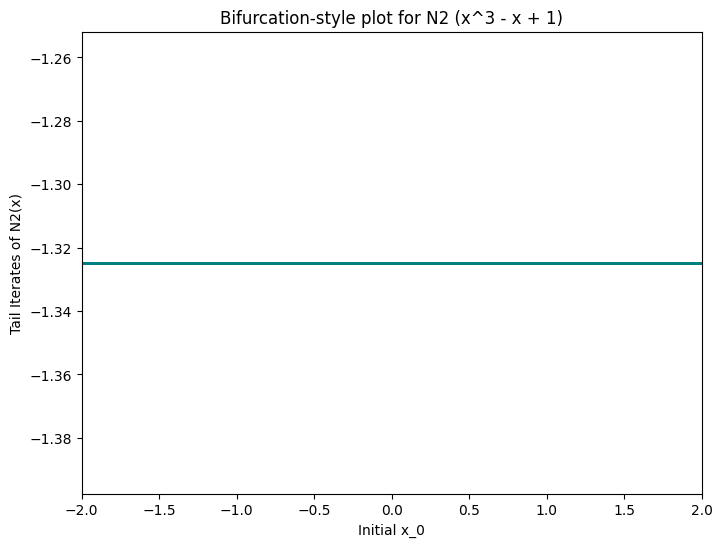

In [14]:
# Optionally, repeat the scan for N2
print("Performing bifurcation‐style scan for N2 …")
xv2, yv2 = bifurcation_scan(N2, x_min=-2.0, x_max=2.0,
                            n_initial=800, n_iter=300, last_k=50)

fig3, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(xv2, yv2, s=0.5, color='teal')
ax3.set_xlim(-2.0, 2.0)
ax3.set_xlabel('Initial x_0')
ax3.set_ylabel('Tail Iterates of N2(x)')
ax3.set_title('Bifurcation‐style plot for N2 (x^3 - x + 1)')
plt.show()

In [15]:
# 6) Print a summary of the polynomial factors of Q1 and Q2
print("\n===============================\n")
print("Summary of symbolic factorization:")
print("-" * 50)
print("Q1(x) factorization (roots = 1‐cycles and 3‐cycles under N1):")
sp.pprint(Q1_factor)
print("\n" + "-"*50)
print("Q2(x) factorization (roots = 1‐cycles and 3‐cycles under N2):")
sp.pprint(Q2_factor)
print("\n===============================\n")



Summary of symbolic factorization:
--------------------------------------------------
Q1(x) factorization (roots = 1‐cycles and 3‐cycles under N1):
⎛ 3        ⎞ ⎛       24          22          21           20           19      ↪
⎝x  - x - 1⎠⋅⎝19456⋅x   - 57152⋅x   + 98368⋅x   + 115216⋅x   - 199120⋅x   + 34 ↪
────────────────────────────────────────────────────────────────────────────── ↪
                               ⎛   2    ⎞ ⎛    6      4       3      2    ⎞ ⎛  ↪
                               ⎝3⋅x  - 1⎠⋅⎝12⋅x  - 9⋅x  + 12⋅x  + 6⋅x  + 2⎠⋅⎝7 ↪

↪      18           17           16          15           14          13       ↪
↪ 880⋅x   + 247332⋅x   - 203414⋅x   - 76291⋅x   + 265372⋅x   - 48108⋅x   - 139 ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪     18         16         15         14         13         12         11     ↪
↪ 68⋅x   - 1296⋅x   + 4896⋅x   + 2808⋅x   - 5184⋅x   + 5490⋅x   + 4536⋅x   - 7 ↪

↪      12          11          10     